In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f901eeafc8a1d5aa365bd9af6ef67a46


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | honningsvag
Processing Record 2 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 3 of Set 1 | tsaratanana
Processing Record 4 of Set 1 | rawson
Processing Record 5 of Set 1 | mahebourg
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | homer
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | vao
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | the valley
Processing Record 15 of Set 1 | luba
Processing Record 16 of Set 1 | hovd
Processing Record 17 of Set 1 | utevka
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | comodoro rivadavia
Processing Record 20 of Set 1 | cidreira
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | garowe
Processing Re

Processing Record 42 of Set 4 | kayes
Processing Record 43 of Set 4 | baghdad
Processing Record 44 of Set 4 | kuala terengganu
Processing Record 45 of Set 4 | bireun
Processing Record 46 of Set 4 | hongjiang
Processing Record 47 of Set 4 | airai
Processing Record 48 of Set 4 | honiara
Processing Record 49 of Set 4 | pevek
Processing Record 50 of Set 4 | laguna
Processing Record 1 of Set 5 | northam
Processing Record 2 of Set 5 | coari
Processing Record 3 of Set 5 | xichang
Processing Record 4 of Set 5 | castro
Processing Record 5 of Set 5 | bengkulu
Processing Record 6 of Set 5 | manakara
Processing Record 7 of Set 5 | kruisfontein
Processing Record 8 of Set 5 | la tuque
Processing Record 9 of Set 5 | zhezkazgan
Processing Record 10 of Set 5 | lavrentiya
Processing Record 11 of Set 5 | mukhen
Processing Record 12 of Set 5 | scottsbluff
Processing Record 13 of Set 5 | port hedland
Processing Record 14 of Set 5 | zachagansk
City not found. Skipping...
Processing Record 15 of Set 5 | gera

Processing Record 28 of Set 8 | trelew
Processing Record 29 of Set 8 | beyneu
Processing Record 30 of Set 8 | vitim
Processing Record 31 of Set 8 | dalnerechensk
Processing Record 32 of Set 8 | libreville
Processing Record 33 of Set 8 | torbay
Processing Record 34 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 35 of Set 8 | alikovo
Processing Record 36 of Set 8 | grand gaube
Processing Record 37 of Set 8 | beringovskiy
Processing Record 38 of Set 8 | shizunai
Processing Record 39 of Set 8 | padang
Processing Record 40 of Set 8 | el cope
Processing Record 41 of Set 8 | longyearbyen
Processing Record 42 of Set 8 | inhambane
Processing Record 43 of Set 8 | college
Processing Record 44 of Set 8 | haicheng
Processing Record 45 of Set 8 | waingapu
Processing Record 46 of Set 8 | marsa matruh
Processing Record 47 of Set 8 | cazaje
City not found. Skipping...
Processing Record 48 of Set 8 | gladstone
Processing Record 49 of Set 8 | sistranda
Processing Record 50 of Set 8 |

Processing Record 15 of Set 12 | sibolga
Processing Record 16 of Set 12 | gannan
Processing Record 17 of Set 12 | lata
Processing Record 18 of Set 12 | lere
Processing Record 19 of Set 12 | marawi
Processing Record 20 of Set 12 | port-gentil
Processing Record 21 of Set 12 | stoyba
City not found. Skipping...
Processing Record 22 of Set 12 | villa carlos paz
Processing Record 23 of Set 12 | martapura
Processing Record 24 of Set 12 | paramonga
Processing Record 25 of Set 12 | de aar
Processing Record 26 of Set 12 | lagos
Processing Record 27 of Set 12 | rocha
Processing Record 28 of Set 12 | launceston
Processing Record 29 of Set 12 | hare bay
Processing Record 30 of Set 12 | rock springs
Processing Record 31 of Set 12 | yaan
Processing Record 32 of Set 12 | lufilufi
Processing Record 33 of Set 12 | sobolevo
Processing Record 34 of Set 12 | sechura
Processing Record 35 of Set 12 | morro bay
Processing Record 36 of Set 12 | mazamari
Processing Record 37 of Set 12 | ruatoria
City not found

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Honningsvag,70.9821,25.9704,26.35,54,20,24.16,NO,2022-04-27 22:31:45
1,Tsaratanana,-16.7833,47.6500,71.53,91,4,4.21,MG,2022-04-27 22:31:46
2,Rawson,-43.3002,-65.1023,47.61,51,100,19.93,AR,2022-04-27 22:31:46
3,Mahebourg,-20.4081,57.7000,73.26,94,20,6.91,MU,2022-04-27 22:31:46
4,Busselton,-33.6500,115.3333,57.76,85,68,10.89,AU,2022-04-27 22:31:47
5,Jamestown,42.0970,-79.2353,31.01,70,100,9.22,US,2022-04-27 22:31:47
6,Homer,59.6425,-151.5483,52.77,69,0,14.97,US,2022-04-27 22:31:06
7,Arraial Do Cabo,-22.9661,-42.0278,78.66,78,0,11.50,BR,2022-04-27 22:31:48
8,Puerto Ayora,-0.7393,-90.3518,76.96,83,35,8.50,EC,2022-04-27 22:31:18
9,Punta Arenas,-53.1500,-70.9167,37.51,48,20,14.97,CL,2022-04-27 22:27:43


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Honningsvag,NO,2022-04-27 22:31:45,70.9821,25.9704,26.35,54,20,24.16
1,Tsaratanana,MG,2022-04-27 22:31:46,-16.7833,47.6500,71.53,91,4,4.21
2,Rawson,AR,2022-04-27 22:31:46,-43.3002,-65.1023,47.61,51,100,19.93
3,Mahebourg,MU,2022-04-27 22:31:46,-20.4081,57.7000,73.26,94,20,6.91
4,Busselton,AU,2022-04-27 22:31:47,-33.6500,115.3333,57.76,85,68,10.89
5,Jamestown,US,2022-04-27 22:31:47,42.0970,-79.2353,31.01,70,100,9.22
6,Homer,US,2022-04-27 22:31:06,59.6425,-151.5483,52.77,69,0,14.97
7,Arraial Do Cabo,BR,2022-04-27 22:31:48,-22.9661,-42.0278,78.66,78,0,11.50
8,Puerto Ayora,EC,2022-04-27 22:31:18,-0.7393,-90.3518,76.96,83,35,8.50
9,Punta Arenas,CL,2022-04-27 22:27:43,-53.1500,-70.9167,37.51,48,20,14.97


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
city_data_df.tail(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
539,Yenagoa,NG,2022-04-27 22:46:36,4.9247,6.2642,73.31,95,100,5.91
540,Bonfim,BR,2022-04-27 22:46:36,3.0833,-59.9500,82.92,68,97,3.47
541,Genhe,CN,2022-04-27 22:46:36,50.7833,121.5167,34.32,41,9,3.40
542,Mahina,PF,2022-04-27 22:46:37,-17.5065,-149.4890,83.97,61,40,8.05
543,Mahajanga,MG,2022-04-27 22:46:38,-15.7167,46.3167,77.07,82,35,8.75
544,Muravlenko,RU,2022-04-27 22:46:39,63.7898,74.5230,31.93,99,100,8.21
545,Muisne,EC,2022-04-27 22:46:39,0.6000,-80.0333,78.40,84,83,7.94
546,Suntar,RU,2022-04-27 22:46:39,62.1444,117.6319,28.89,76,75,4.85
547,Clinton,US,2022-04-27 22:46:40,42.5870,-82.9199,42.12,62,75,10.36
548,Zlotow,PL,2022-04-27 22:46:40,53.3635,17.0408,44.29,67,99,6.87


In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

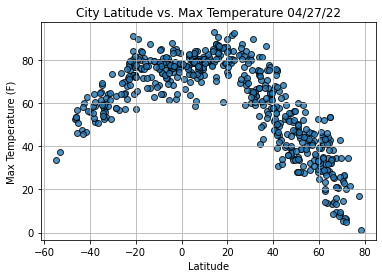

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

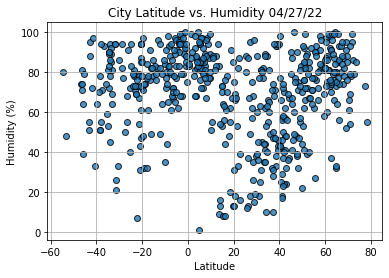

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

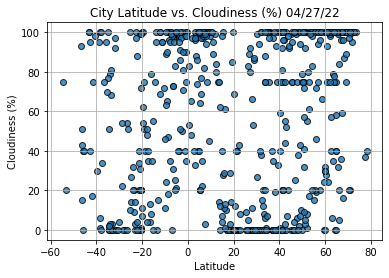

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

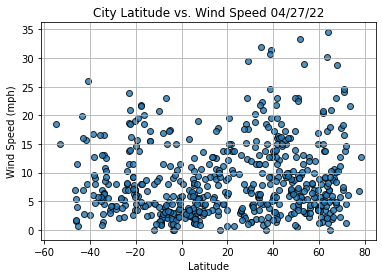

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                         Luba
Country                        GQ
Date          2022-04-27 22:31:49
Lat                        3.4568
Lng                        8.5547
Max Temp                    77.94
Humidity                       87
Cloudiness                     97
Wind Speed                   6.98
Name: 13, dtype: object

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Honningsvag,NO,2022-04-27 22:31:45,70.9821,25.9704,26.35,54,20,24.16
5,Jamestown,US,2022-04-27 22:31:47,42.0970,-79.2353,31.01,70,100,9.22
6,Homer,US,2022-04-27 22:31:06,59.6425,-151.5483,52.77,69,0,14.97
12,The Valley,AI,2022-04-27 22:31:49,18.2170,-63.0578,77.83,62,29,13.82
13,Luba,GQ,2022-04-27 22:31:49,3.4568,8.5547,77.94,87,97,6.98


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

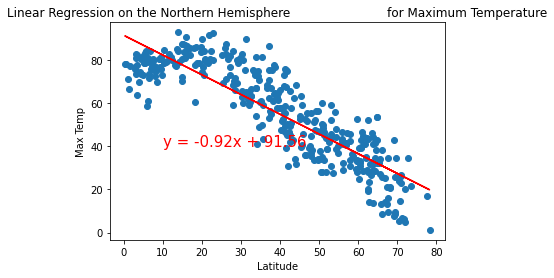

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

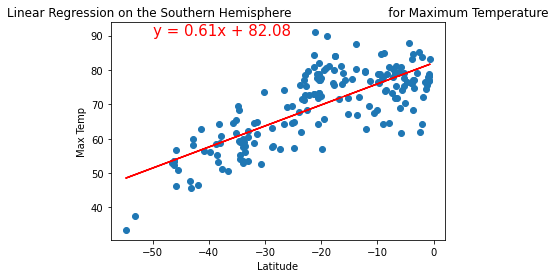

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

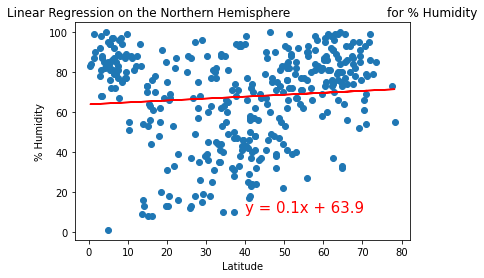

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

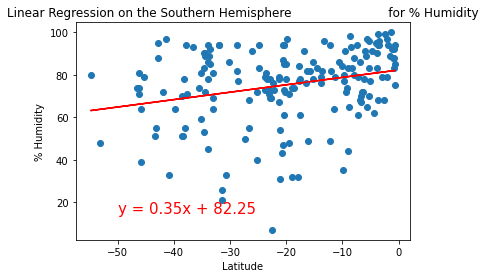

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

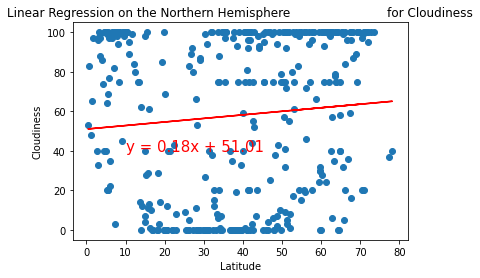

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(10,40))

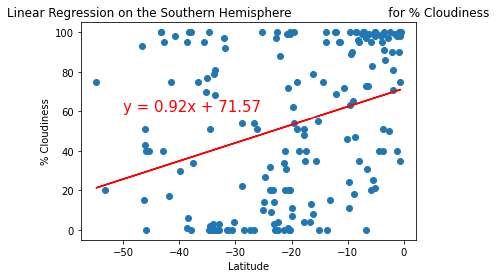

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

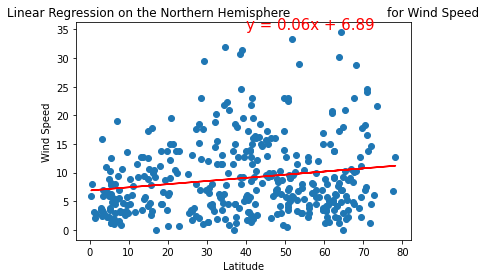

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

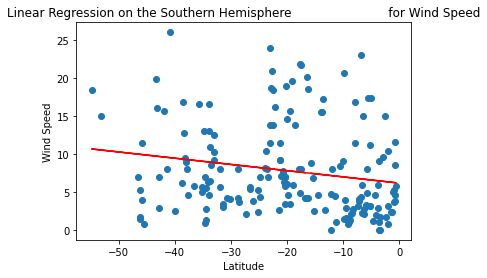

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))